# WORDLE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tqdm import tqdm as ProgressDisplay
import math

### Lecture des fichiers de mots de 5 lettres

In [4]:
# mots_1 = pd.read_json("mots.json")
mots_sc = pd.read_table("mots.txt",header=None) #version science etonnante
mots = pd.read_json("mots_off.json") #officielle depuis loane
words = pd.read_json("wordle_us.json")
data = mots.copy()
# alphabet= np.array(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
# alphabet= np.array(list('abcdefghijklmnopqrstuvwxyz'))
# frequence = {}
# for l in alphabet:
#     frequence[l]=0
# data.shape
dimension = data.size
print(dimension)

6025


### Convertir un array en string

In [5]:
def convert_array_mot(arr):
    return np.array([''.join(chr(e) for e in ligne )for ligne in arr])

### Convertir une string en array

In [6]:
def convert_mot_array(mots):
    return np.array([[ord(c)for c in w] for w in mots], dtype=np.uint8)

In [7]:
mots_array = convert_mot_array(data[0])
mots_array.shape
words_array = convert_mot_array(words[0])
words_array.shape
mots_sc_array = convert_mot_array(data[0])
mots_sc_array.shape


(6025, 5)

## Algorithm principal
 qui renvoie les options valides pour un mot, une pattern et une liste de mots
 * check : mot à tester
 * pattern : la pattern de type '01120'
 * M : le dictionnaire de mots

In [8]:
def check_mot_pattern(check,pattern,M=mots_array.copy(),k=5):
    # M = mots_array.copy()
    cnt = M.shape[0]
    for n in range(k):  # k = nb de lettres dans le mot
        c =ord(check[n])
        if (pattern[n]=='0'):
            # for i in range(k):
            #     M = M[~(M[:,i] == c)]
            P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
            M = np.insert(M,0,P,axis=1)
            M = M[(M[:,0] == 0)]
            M = np.delete(M,0,axis=1)
        elif (pattern[n]=='2'):
            M = M[(M[:,n] == c)]
        else: # (pattern[n]=='1'):
            M = M[~(M[:,n] == c)] # on elimine la bonne postion
            # P = (M[:] == c)
            P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
            # T = (np.sum(P[:], axis=1)).reshape((1,M.shape[0]))
            M = np.insert(M,0,P,axis=1)
            M = M[(M[:,0] > 0)]
            M = np.delete(M,0,axis=1)
    return M,M.shape[0]

In [9]:
def add_lettre(L,dic):
    if L in dic.keys():
        dic[L] += 1
    else:
        dic[L] = 1
    return dic

In [10]:
def add_dic(L,dic,p,lettre):
    if L in dic.keys():
        dic[L]['n'] += 1
        dic[L]['p'].append(p)
    else:
        dic[L] = { 'n':1, 'p':[p]}
    lettre = add_lettre(L,lettre)
    return dic,lettre

In [11]:
def check_mot_pattern_v2(check,pattern,M=mots_array.copy(),vv=False,k=5):
    E=dict()#2
    I=dict() #1
    O=dict() #0
    L=dict() # les lettres
    T = np.array([0,1,2,3,4])
    for i in range(k):
        p=pattern[i];
        if (vv):
            print(p,i,E,I,O,L)
        if (p=='2'):
            E, L = add_dic(check[i],E,i,L)
            T = T[T[:] != i]
        if (p=='1'):
            I, L = add_dic(check[i],I,i,L)
        if (p=='0'):
            O, L = add_dic(check[i],O,i,L)
    if (vv):
        print('Lettres: ',L)
        print('E=2 :',E)
        print('I=1 :',I)
        print('O=0 :',O)
        print('masque: ',T)
    # On ne conserve que les 2=E
    for i in E:
        for p in E[i]['p']:
            if (vv):
                print(i,ord(i),p)
            M = M[(M[:,p] == ord(i))]
    # On élimine les 0 en place
    for i in O:
        for p in O[i]['p']:
            if (vv):
                print(i,ord(i),p)
            M = M[(M[:,p] != ord(i))]
        if (L[i] == 1):
            print('UNIQUE')
            
    # On élimine les 1 en place
    for i in I:
        for p in I[i]['p']:
            if (vv):
                print(i,ord(i),p)
            M = M[(M[:,p] != ord(i))]
    return M,M.shape[0]


In [477]:
#test new mot
mat,n = check_mot_pattern_v2('ETETA','20210',vv=True)
print(n,convert_array_mot(mat))
print(mat,n)

2 0 {} {} {} {}
0 1 {'E': {'n': 1, 'p': [0]}} {} {} {'E': 1}
2 2 {'E': {'n': 1, 'p': [0]}} {} {'T': {'n': 1, 'p': [1]}} {'E': 1, 'T': 1}
1 3 {'E': {'n': 2, 'p': [0, 2]}} {} {'T': {'n': 1, 'p': [1]}} {'E': 2, 'T': 1}
0 4 {'E': {'n': 2, 'p': [0, 2]}} {'T': {'n': 1, 'p': [3]}} {'T': {'n': 1, 'p': [1]}} {'E': 2, 'T': 2}
Lettres:  {'E': 2, 'T': 2, 'A': 1}
E=2 : {'E': {'n': 2, 'p': [0, 2]}}
I=1 : {'T': {'n': 1, 'p': [3]}}
O=0 : {'T': {'n': 1, 'p': [1]}, 'A': {'n': 1, 'p': [4]}}
masque:  [1 3 4]
E 69 0
E 69 2
T 84 1
A 65 4
UNIQUE
T 84 3
17 ['ELEVE' 'EVEIL' 'EBENE' 'EMEUT' 'EPEES' 'ELEGI' 'EWEES' 'EJECT' 'ELEIS'
 'ELEMI' 'EMERI' 'EXEAT' 'EDENS' 'EPELE' 'EMEUS' 'EGEEN' 'EVENT']
[[69 76 69 86 69]
 [69 86 69 73 76]
 [69 66 69 78 69]
 [69 77 69 85 84]
 [69 80 69 69 83]
 [69 76 69 71 73]
 [69 87 69 69 83]
 [69 74 69 67 84]
 [69 76 69 73 83]
 [69 76 69 77 73]
 [69 77 69 82 73]
 [69 88 69 65 84]
 [69 68 69 78 83]
 [69 80 69 76 69]
 [69 77 69 85 83]
 [69 71 69 69 78]
 [69 86 69 78 84]] 17


In [12]:
def check_mot_pattern_new(check,pattern,M=mots_array.copy(),k=5):
    E=[] #2
    I=[] #1
    O=[] #0
    Il = dict()
    It = dict()
    for i in range(k):
        p=pattern[i]
        try:
            It[check[i]] += 1
        except:
            It[check[i]] = 1
        if (p=='0'):
            a = np.array((int(i) ,int(ord(check[i]))), dtype=np.uint8) # np.int16)
            O = np.append(O,a,axis=0)
            # It[check[i]] -= 1;
        elif (p=='1'):
            I.append([i, ord(check[i])])
            try:
                Il[check[i]] += 1
            except:
                Il[check[i]] = 1
        elif (p=='2'):
            E.append([i, ord(check[i])])
            # It[check[i]] -= 1;
    # On élimine les (2)
    T = np.array([0,1,2,3,4])
    for i in E:
        M = M[(M[:,i[0]] == i[1])]
        T = T[T[:] != i[0]]
    # on elimne 
    try:
        dO = int(O.shape[0] / 2)
        if (dO>0):
            O = O.reshape(dO,2)
        for j in O:
            M = M[(M[:,int(j[0])] != int(j[1]))]
        # for i in E: 
        #     O = O[(O[:,1] != i[1])]
        for i in I:
            O = O[(O[:,1] != i[1])]
    except:
        a=0
    # print(T)
    # print('elim 0 en place',M.shape,convert_array_mot(M) )
    for i in O:
        P = (np.sum(M[:,T] == i[1],axis=1)).reshape((1,M.shape[0]))
        M = np.insert(M,0,P,axis=1)
        M = M[(M[:,0] == 0)]
        M = np.delete(M,0,axis=1)
    # print('0 elim',M.shape,convert_array_mot(M) )
    # print(I,Il)
    for i in I:
        M = M[~(M[:,i[0]] == i[1])] # on elimine la bonne postion
    # print('1 elim',M.shape,convert_array_mot(M) )
    # print(T)
    # print('O',O,'I',I,'E',E,Il,It)
    if (len(I)>0):
        for i in Il:
            if (It[i]>Il[i]):
                a = (np.sum(M[:,T]==ord(i),axis=1) == Il[i])
            else:
                a = (np.sum(M[:,T]==ord(i),axis=1) >= Il[i])
            M = np.insert(M,0,a,axis=1)
            M = M[(M[:,0] == True)]
            M = np.delete(M,0,axis=1)
            # print('elim',i,M.shape,convert_array_mot(M) )
    return M, len(M)

In [478]:
#test new mot
mat, n = check_mot_pattern_new('ETETA','20210')
print(n,convert_array_mot(mat))

3 ['EMEUT' 'EJECT' 'EVENT']


In [363]:
#test new mot
mat, n = check_mot_pattern_new('ETETE','00000')
print(n,convert_array_mot(mat))
mat, n = check_mot_pattern('ERRER','10100')
print(n,convert_array_mot(mat))

1780 ['AUSSI' 'QUAND' 'ALORS' ... 'QUIPU' 'HINDI' 'SLANG']
0 []


In [349]:
#test new mot
mat, n = check_mot_pattern_new('amply','20010',words_array)
print(n,convert_array_mot(mat))

# doit fournir 105 réponse


105 ['alone' 'altar' 'aloft' 'allow' 'awful' 'alien' 'alike' 'aloud' 'annul'
 'alive' 'algae' 'align' 'avail' 'afoul' 'along' 'aglow' 'alter' 'alert'
 'abled' 'aloof' 'angel' 'axial' 'allot' 'anvil' 'alibi' 'aalii' 'abler'
 'ables' 'ablet' 'ablow' 'aboil' 'aflaj' 'aglee' 'aglet' 'agloo' 'aglus'
 'ailed' 'alack' 'aland' 'alane' 'alang' 'alans' 'alant' 'alate' 'albas'
 'albee' 'alcid' 'alcos' 'aldea' 'alder' 'aldol' 'aleck' 'alecs' 'alefs'
 'aleft' 'alews' 'alfas' 'algal' 'algas' 'algid' 'algin' 'algor' 'alias'
 'alifs' 'aline' 'alist' 'alkie' 'alkos' 'allee' 'allel' 'allis' 'allod'
 'alods' 'aloed' 'aloes' 'aloha' 'aloin' 'aloos' 'alowe' 'altho' 'altos'
 'alure' 'alvar' 'anlas' 'annal' 'areal' 'argal' 'argil' 'argol' 'ariel'
 'arled' 'arles' 'artal' 'artel' 'arval' 'atlas' 'aulas' 'aulic' 'auloi'
 'aulos' 'aural' 'aweel' 'axled' 'axles' 'azlon']


In [354]:
#test new mot
mat, n = check_mot_pattern_new('ERRES','10120')
print(n,convert_array_mot(mat))

43 ['LEGER' 'LEVER' 'JETER' 'MENER' 'CEDER' 'WEBER' 'MELER' 'GENER' 'REJET'
 'FETER' 'PETER' 'RIDEE' 'RAYEE' 'VEXER' 'RATEE' 'TETER' 'GELER' 'ROTEE'
 'ROBEE' 'RUPEE' 'RIPEE' 'GUEER' 'RECEZ' 'RADEE' 'REBEU' 'REBEC' 'QUEER'
 'RAPEE' 'RIVEE' 'PELER' 'HELER' 'RECEL' 'RODEE' 'RACEE' 'VELER' 'ROUEE'
 'NEPER' 'CELER' 'RIMEE' 'FELER' 'BELER' 'RAMEE' 'REGEL']


In [347]:
# test check mot DEBIT avec PETIT
mat, n = check_mot_pattern('PETIT','02022')
print(n,convert_array_mot(mat))
mat, n = check_mot_pattern_new('PETIT','02022')
print(n,convert_array_mot(mat))

0 []
8 ['RECIT' 'DEBIT' 'DELIT' 'LEDIT' 'BENIT' 'REDIT' 'DEDIT' 'MEDIT']


In [72]:
M=mots_array.copy()
# print(M)
c=ord('E')
print(c,M.shape)
# print(M[~(M[:] == c)].shape)
P = (np.sum(M[:] == c,axis=1)).reshape((1,M.shape[0]))
M = np.insert(M,0,P,axis=1)
M = M[(M[:,0] == 0)]
M = np.delete(M,0,axis=1)
print(M.shape,M)


69 (6025, 5)
(2438, 5) [[65 85 83 83 73]
 [81 85 65 78 68]
 [65 76 79 82 83]
 ...
 [81 85 73 80 85]
 [72 73 78 68 73]
 [83 76 65 78 71]]


In [40]:
ret = mots_array.copy()
ret, nb = check_mot_pattern('RIMES','00100',ret)
if (nb>0):
    entropie = -log2_(nb,dimension)
else:
    entropie=0
print(nb,dimension,entropie,convert_array_mot(ret))

55 6025 -6.775385812480026 ['CHAMP' 'AMANT' 'PLOMB' 'ALBUM' 'MATCH' 'AMONT' 'MACON' 'MAGMA' 'MATOU'
 'MAGOT' 'MOULT' 'MATON' 'MOLLO' 'MOULU' 'MULLA' 'TAXUM' 'MANUL' 'LOUMA'
 'XALAM' 'MAQAM' 'MANOU' 'MANTA' 'MUNDA' 'MUNGO' 'OGHAM' 'MULCH' 'MANON'
 'MANAT' 'MYTHO' 'CLAMP' 'NDAMA' 'FANUM' 'MODAL' 'MALON' 'MAZOT' 'MANGA'
 'FATMA' 'MULOT' 'MACHO' 'MOGOL' 'FATUM' 'MATAF' 'MACHA' 'MUANT' 'BLOOM'
 'MOLTO' 'MANDA' 'CAVUM' 'DOUMA' 'PLUMA' 'MOULA' 'MULON' 'MOUND' 'AMBON'
 'MANGO']


In [13]:
def lettre_in(lettre,mot):
    return mot.find(lettre) 

## Creation de la pattern globale pour l'ensemble de 243 permutations (3^5)

In [14]:
def make_pattern(p=5):
    pattern=[]
    for k in range(pow(3,5)):
        if (k<1):
            pattern.append(np.base_repr(k,3,5))
        elif (k<3):
            pattern.append(np.base_repr(k,3,4))
        elif (k<9):
            pattern.append(np.base_repr(k,3,3))
        elif (k<27):
            pattern.append(np.base_repr(k,3,2))
        elif (k<81):
            pattern.append(np.base_repr(k,3,1))
        else:
            pattern.append(np.base_repr(k,3))
    return pattern

In [15]:
pattern = make_pattern(5)

## Calcul de l'Entropie

In [16]:
def log2_(val,div):
    return math.log2(div/val) if val >0 else 0

In [17]:
def entropie_mot_old(check, M=mots_array.copy()):
    dim = M.shape[0]
    e_sum=0
    e_pattern=[]
    for p in pattern:
        ret, nb = check_mot_pattern(check,p,M)
        # print(nb,p,dim)
        e = log2_(nb,dim)
        e_pattern.append(e)
        e_sum = e_sum + e*nb/dim
    return e_sum,e_pattern


In [18]:
def entropie_mot(check, M=mots_array.copy(), debug=False):
    dim = M.shape[0]
    e_sum=0
    e_pattern=[]
    for p in pattern:
        ret, nb = check_mot_pattern_new(check,p,M)
        e = log2_(nb,dim)
        e_pattern.append(e)
        e_sum = e_sum + e*nb/dim
        if (debug):
            print(f'{nb:5} {p:7} {dim:4} {">":->6} {e:=2.4f} {e_sum:2.4f} {e*nb/dim:2.4f}')
    return e_sum,e_pattern


3.19474881208606
[1.567351026159954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.2168955231200616, 5.366920967124669, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.0098510661170494, 6.252964777827583, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.7526145048213686, 0, 0, 6.308818012561101, 0, 0, 0, 0, 0, 5.523322524467236, 0, 0, 7.698764530877114, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.357073181168322, 10.97178302528353, 0, 7.649854930396168, 11.556745526004686, 0, 0, 0, 0, 7.912889336229962, 9.749390603947083, 0, 12.556745526004686, 10.97178302528353, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.299357683312034, 0, 0, 8.033183569947674, 12.556745526004686, 0, 0, 0, 0, 7.033183569947673, 10.556745526004686, 0, 8.856305807863594, 10.97178302528353, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.5014630905034965, 0, 0, 11.556745526004686, 0, 0, 0, 0, 0, 10.55674

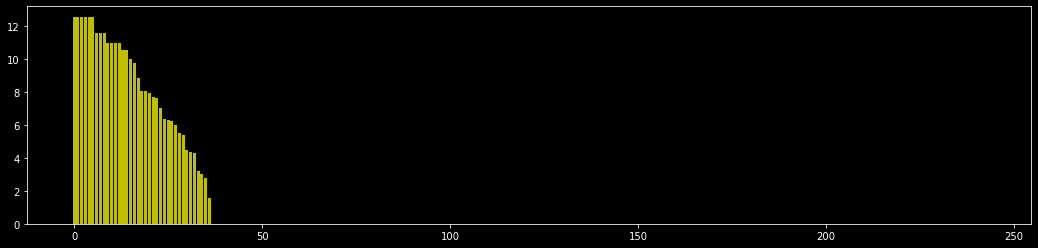

In [355]:
e, e_p = entropie_mot_old('SASSA')
print(e)
gr = np.sort(e_p)[::-1]
# print(gr)
plt.figure(figsize=(18,4))
plt.bar(x=range(243),height=gr,color='y')
print(e_p)

6.21958921302649
[4.723855511839945, 4.138893011118788, 3.945720728697334, 5.04895088580599, 5.545518270581432, 4.964288488736606, 6.271343307142438, 7.002156674327049, 6.884320184033191, 6.327926835508805, 4.9201209054610375, 5.545518270581432, 6.801858023841218, 6.234817431117324, 6.448221069226517, 7.602549215617811, 8.234817431117325, 8.97178302528353, 7.42746250905972, 6.327926835508805, 6.1991935213866025, 8.386820524562374, 8.234817431117325, 9.749390603947083, 8.386820524562374, 9.386820524562374, 9.09731390736739, 4.7365665635894985, 5.81527853960354, 5.942035681889478, 5.698764530877114, 8.09731390736739, 7.469282684754347, 7.512351406646233, 9.749390603947083, 10.234817431117325, 6.081012095038289, 7.347292160375736, 6.602549215617811, 8.09731390736739, 9.556745526004686, 10.556745526004686, 8.856305807863594, 11.556745526004686, 10.556745526004686, 7.698764530877114, 8.749390603947083, 11.556745526004686, 10.556745526004686, 11.556745526004686, 12.556745526004686, 10.556745

7.284448993957855

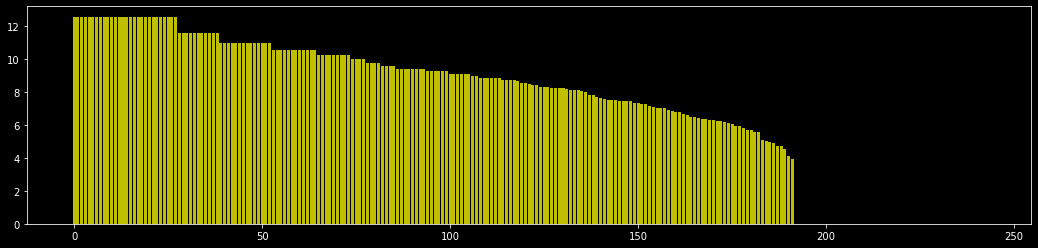

In [370]:
e, e_p = entropie_mot('TARIE',mots_sc_array,False)
print(e)
gr = np.sort(e_p)[::-1]
# print(gr)
plt.figure(figsize=(18,4))
plt.bar(x=range(243),height=gr,color='y')
print(e_p)
np.mean(e_p)

# Calcul initial

Cela permet de déterminer dans 'liste_entropie' l'entropie de tous les mots dans le dictionnaire

L'entropie c'est : E = - log(p)/log(2)
ou p est la probabilité


In [359]:
# initialement 9m05s ... maintenat 12:50 avec 6025 mots
liste_entropie = {}
for mot in ProgressDisplay(data[0]):
    liste_entropie[mot] = entropie_mot(mot)[0]
liste_entropie = sorted(liste_entropie.items(), key=lambda x: x[1],reverse=True)

100%|██████████| 6025/6025 [07:19<00:00, 13.70it/s]


In [346]:
mat, n = check_mot_pattern_new('ERRES','01101')
print(n,convert_array_mot(mat))
e = log2_(n,6025)
print('entropie',e)


1 ['ROSIR']
entropie 12.556745526004686


In [ ]:
a,b =entropie_mot('ERRES')
print(a)
i=0
cum=0
for c in b:
    print(pattern[i],c)
    cum += c
    i += 1
print(cum, cum/pow(5,3))

In [360]:
h = liste_entropie[0:60]
print(list(iter(h)))
# for item in h:
#     for i in item:
#         print(i)
# print(h)

[('AERER', 7.325809110692398), ('ERRES', 7.241712992795276), ('EPEES', 7.196990580356944), ('AERES', 7.168928171579571), ('SENSE', 7.151685995161319), ('ELEIS', 7.113389430488117), ('SERRE', 7.11046938414637), ('CESSE', 7.050021488485621), ('REELS', 7.041560979783501), ('ASSAI', 7.030840749659542), ('ETETE', 6.959623738377852), ('TERRE', 6.9558623594298945), ('SASSE', 6.946200169276997), ('PESSE', 6.91260722935931), ('MESSE', 6.908255290114423), ('LIEES', 6.905906806459804), ('ELIES', 6.901470753768046), ('RUEES', 6.895879647644094), ('SAISI', 6.881059798983539), ('OREES', 6.863174497146993), ('SERIE', 6.846303556018069), ('TASSE', 6.840013710397421), ('NIEES', 6.811612601794643), ('ETRES', 6.8061923077750714), ('CREER', 6.801789510321515), ('ANEES', 6.780587369540955), ('TETES', 6.780303692655573), ('ERSES', 6.778634601810519), ('LASSE', 6.769567924840717), ('TUEES', 6.761154119611342), ('SOSIE', 6.758589931720924), ('RISSE', 6.743869325922122), ('RENES', 6.740215882106447), ('SASSA',

## Aide au jeux
temps initial = 6,6s

Nous proposons RIMES
et calculons au préalable sont Entropie = 5,71971

nous jouons pour obtenir un résultat ⬛⬛🟨⬛⬛ soit '00100'

au final l'Entropie de ce choix est de 6,775 puisqu'il nous reste plus que 55 possibilités


In [26]:
E, E_detail = entropie_mot('RIMES')
print("Entropie de 'RIMES' = ",E)
ret,e = check_mot_pattern('RIMES','00100')
# print(pattern.index('00100')) marche pas car retrié !!!
print("Entropie si pattern='00100' ",math.log2(dimension/e))


Entropie de 'RIMES' =  5.719713732680308
Entropie si pattern='00100'  6.775385812480026


In [19]:
def conseil(check,pattern,M=mots_array.copy()):
    ret, nb = check_mot_pattern_new(check,pattern,M)
    E = -log2_(nb,M.shape[0])
    new_liste = convert_array_mot(ret)
    # print(nb, E)
    new_entropie = {}
    for mot in ProgressDisplay(new_liste):
        new_entropie[mot] = entropie_mot(mot,ret)
    # print(f'Test : {new_entropie}')
    return(list(new_entropie))

In [363]:
# 
ret, nb = check_mot_pattern('MOULE','00001',mots_array.copy())
E = - log2_(nb,dimension)
new_liste = convert_array_mot(ret)
print(nb, E)
new_entropie = {}
for mot in ProgressDisplay(new_liste):
    new_entropie[mot] = entropie_mot(mot,ret)
new_entropie = sorted(new_entropie.items(), key=lambda x: x[1],reverse=True)


682 -3.1431175969805136


100%|██████████| 682/682 [00:21<00:00, 32.36it/s]


In [364]:
print(dimension,ret.shape)
# print(f'Test : {new_entropie[:20]}')

6025 (682, 5)


In [817]:
# ret=mots_array.copy()
dim = ret.shape[0]
ret, nb = check_mot_pattern('PARTE','02101',ret)
print(nb)
E = - log2_(nb,dim)
new_liste = convert_array_mot(ret)
print(nb, dim, E,new_liste)

31
31 682 -4.459431618637297 ['RACES' 'RAIES' 'NAGER' 'RASER' 'RASES' 'BAVER' 'CASER' 'RAYES' 'RAYER'
 'RADES' 'FAXER' 'BADER' 'RADER' 'HAVER' 'RAVER' 'GAVER' 'RAVES' 'RAGES'
 'FANER' 'BAYER' 'JASER' 'BASER' 'FADER' 'CANER' 'RAGER' 'GAZER' 'RACER'
 'GAGER' 'VASER' 'CAVER' 'RABES']


# Simulation de jeux

* data[0] : liste de mots du dictionnaire
* mots_array : tableau des mots

In [20]:
def test_mot(check,ref,k=5):
    rep=np.array([0,0,0,0,0])
    for i in range(k):
        if (check[i]==ref[i]):
            rep[i]=2
        else:
            if (lettre_in(check[i],ref) == -1):
                rep[i] = 0
            else:
                rep[i] = 1
    return rep

In [21]:
def affiche_score(arr,k=5):
    rep=''
    for i in range(k):
        if (arr[i]==2):
            rep = rep + '🟩'
        if (arr[i]==1):
            rep = rep + '🟨'
        if (arr[i]==0):
            rep = rep + '⬛'
    return rep

In [22]:
def tire_sort():
    ret = np.random.choice(data[0])
    return ret

In [20]:
def toStr(arr):
    ret = ''
    for c in arr:
        ret = ret + str(c)
    return ret

In [21]:
secret = tire_sort()
print('le mot secret est : ',secret)

le mot secret est :  FEMUR


In [850]:
first='ORVET'
rep = test_mot(first,secret)
print (affiche_score(rep))

⬛🟨⬛🟨⬛


In [851]:
ret, nb = check_mot_pattern(first,'10001',mots_array.copy())
convert_array_mot(ret)

array(['TOTAL', 'PHOTO', 'TOITS', 'PONTS', 'COTON', 'COUTS', 'MOTIF',
       'BATON', 'BOUTS', 'GOUTS', 'FOUTU', 'FLOTS', 'TALON', 'AUTOS',
       'STOCK', 'MONTS', 'STYLO', 'ILOTS', 'PITON', 'TANGO', 'TABOU',
       'HOSTO', 'PATIO', 'MOTOS', 'MATOU', 'TONDU', 'MATON', 'TONUS',
       'TIMON', 'LOTUS', 'GOTHA', 'TOMMY', 'TCHAO', 'COTIS', 'MOITI',
       'NUTON', 'TOSAS', 'TOLBA', 'TOLUS', 'BOTOS', 'TOKAJ', 'FITOU',
       'THIOF', 'TONCA', 'TONKA', 'ATOCA', 'TOBYS', 'DIOTS', 'POTTO',
       'TIFOS', 'DHOTI', 'TOFUS', 'BOTOX', 'SOFTS', 'THIOL', 'TAXOL',
       'FOOTS', 'STOTS', 'ABOTS', 'KOTOS', 'TUTOS', 'TOMAN', 'POTUS',
       'TONFA', 'AOUTS', 'GOUTU', 'SOTHO', 'PITOU', 'JOTAS', 'SCATO',
       'HOSTS', 'SOTCH', 'MATOS', 'TYPON', 'POSTS', 'SHOTS', 'DOITS',
       'FUTON', 'CLITO', 'TAINO', 'TAXON', 'TAUON', 'ZLOTY', 'LOFTS',
       'COLTS', 'TACOS', 'TONGS', 'TOUTS', 'BUTOS', 'TONDO', 'PATOU',
       'MYTHO', 'TAPON', 'DOTAL', 'TOPIC', 'HOSTA', 'COATI', 'POTIN',
       'THONS', 'TIS

In [846]:
ret = check_mot_pattern('ORVET','00000')
print(ret)

(array([[65, 85, 83, 83, 73],
       [81, 85, 65, 78, 68],
       [65, 73, 78, 83, 73],
       ...,
       [81, 85, 73, 80, 85],
       [72, 73, 78, 68, 73],
       [83, 76, 65, 78, 71]], dtype=uint8), 629)


In [39]:
rep = test_mot('TOITS',secret)
print(toStr(rep))
affiche_score(rep)

00100


'⬛⬛🟨⬛⬛'

In [761]:
conseil('AIRES','11001')

0it [00:00, ?it/s]


[]

In [41]:
data[0].searchsorted('MOULE')

2004

In [23]:
#simuler un jeu
def simul():
    secret = tire_sort()
    propal = 'RAIES' #plus forte Entropie
    filtre = mots_array.copy() # init avec tous le dictionnaire
    iter=0
    while (propal != secret):
        reponse = test_mot(propal,secret) # plus forte entropie
        filtre,nb = check_mot_pattern(propal,toStr(reponse),filtre)
        propal = conseil(propal,toStr(reponse),filtre)[0]
        print(iter, propal, secret, affiche_score(reponse))
        iter = iter +1
    return iter

In [ ]:
jeux=np.array((0))
print(jeux)
for i in range(5):
    jeux = np.append(jeux,simul())
print('Moyenne des succès :',jeux.mean(axis=0))

In [44]:
var = '🟩⬛🟨'

In [45]:
jeux.mean()


3.6666666666666665

In [64]:
reponse = conseil('AIRES','10011')
reponse = conseil('CAUSE','02012',convert_mot_array(reponse))
reponse = conseil('SABLE','12002',convert_mot_array(reponse))
# reponse = conseil('JUGEE','00021',convert_mot_array(reponse))
# reponse = conseil('TOMAH','12011',convert_mot_array(reponse))
# print(reponse)
# a,b = check_mot_pattern_new('PETIT','02022',convert_mot_array(reponse))
# print(convert_array_mot(a),b)
# reponse = conseil('PETIT','02022',convert_mot_array(reponse))
# reponse = conseil('NAGER','02022',convert_mot_array(reponse))
# reponse = conseil('RATER','12222',convert_mot_array(reponse))
reponse

100%|██████████| 4/4 [00:00<00:00, 31.20it/s]


['VASTE', 'FASTE', 'JASPE', 'HASTE']

In [360]:
convert_array_mot(a)

array(['DEBIT', 'BENIT', 'DEDIT', 'MEDIT'], dtype='<U5')

In [61]:
# reponse = conseil('crane','00000',words_array)
# reponse = conseil('blush','01000',convert_mot_array(reponse))
# reponse = conseil('pilot','00110',convert_mot_array(reponse))
reponse = conseil('godly','02022',convert_mot_array(reponse))
print(reponse)

100%|██████████| 4/4 [00:00<00:00, 28.95it/s]

['lowly', 'wooly', 'jowly', 'mooly']


In [367]:
inter = reponse.copy()

# CORRECTION

In [368]:
print(inter)
mat, n = check_mot_pattern_new('aglow','20222',convert_mot_array(inter))
print(n,convert_array_mot(mat))


['allow', 'aglow', 'aloof', 'aflaj', 'agloo', 'algal', 'aloha']
1 ['allow']


In [274]:
reponse = conseil('amply','20010',convert_mot_array(inter))
print(inter)
print(reponse)

100%|██████████| 7/7 [00:00<00:00, 34.30it/s]

['allow', 'aglow', 'aloof', 'aflaj', 'agloo', 'algal', 'aloha']
['allow', 'aglow', 'aloof', 'aflaj', 'agloo', 'algal', 'aloha']


In [275]:
reponse=conseil('TARIE','00112')
print(reponse)

100%|██████████| 69/69 [00:02<00:00, 32.40it/s]

['LIVRE', 'VIVRE', 'LIBRE', 'NOIRE', 'PRISE', 'BOIRE', 'CRISE', 'RICHE', 'PRIVE', 'REINE', 'GRISE', 'VOIRE', 'CRIME', 'BRISE', 'BIERE', 'RUINE', 'PRIME', 'FOIRE', 'FIERE', 'CUIRE', 'BRIDE', 'POIRE', 'FRISE', 'FIBRE', 'URINE', 'NUIRE', 'FRIME', 'GIVRE', 'VIBRE', 'ELIRE', 'LUIRE', 'CIDRE', 'ERIGE', 'RINCE', 'RIDEE', 'FRIPE', 'FRIRE', 'MOIRE', 'SPIRE', 'RISEE', 'RUILE', 'RIPEE', 'RIFFE', 'ERINE', 'IRONE', 'BRIEE', 'RISSE', 'LIURE', 'CIPRE', 'CRIEE', 'ROIDE', 'BRIBE', 'PRIEE', 'BIGRE', 'RIVEE', 'FIFRE', 'IRISE', 'DRIVE', 'BRIME', 'GRIVE', 'RIFLE', 'BRIZE', 'GRIME', 'RIMEE', 'MIGRE', 'IBERE', 'SBIRE', 'RIBLE', 'BUIRE']


In [276]:
reponse = conseil('LIBRE','01122',convert_mot_array(reponse))
reponse

100%|██████████| 4/4 [00:00<00:00, 31.23it/s]


['BOIRE', 'IBERE', 'SBIRE', 'BUIRE']